In [91]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import seaborn as sns

In [3]:
data = "C:/Users/Magus/Desktop/cartobcn/Excels/barris_data_final.xlsx"
df = pd.read_excel(data)

In [4]:
test = df.sort_values(['Household_income_dis (Barcelona = 100)'], ascending=[0])

In [221]:
#CPI Catalunia
cpi_cat = r"C:/Users/Magus/Documents/Projects/Citython2018/CATCPI.csv"
#CPI Spain
cpi_esp = r"C:/Users/Magus/Documents/Projects/Citython2018/ESPCPI.csv"
#Income Levels 
incomes = r"C:/Users/Magus/Documents/Projects/Citython2018/Income.csv"
#Mental Health Patients CatStat
mpatients = r"C:/Users/Magus/Documents/Projects/Citython2018/mentalpatients.csv"
#Mental Health Beds by CatStat
mbeds = r"C:/Users/Magus/Documents/Projects/Citython2018/mentalbeds.csv"
#People per Doctors by CatStat
ptod = r"C:/Users/Magus/Documents/Projects/Citython2018/patientstodoctor.csv"
#Population Growth by CatStat
pgro = r"C:/Users/Magus/Documents/Projects/Citython2018/pgrowth.csv"
#Rent
rnt = r"C:/Users/Magus/Documents/Projects/Citython2018/rent.csv"
#District Population
dpo = r"C:/Users/Magus/Documents/Projects/Citython2018/districtpop.csv"


catcpi = pd.read_csv(cpi_cat, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
espcpi = pd.read_csv(cpi_esp, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
income = pd.read_csv(incomes, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
mbed = pd.read_csv(mbeds, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
mpatient = pd.read_csv(mpatients, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
pperd = pd.read_csv(ptod, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
pgrowth = pd.read_csv(pgro, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
rent = pd.read_csv(rnt, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
dpop = pd.read_csv(dpo, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )


In [222]:
bcnrent = []
bcnrent.append(rent["2014"].mean())
bcnrent.append(rent["2015"].mean())
bcnrent.append(rent["2016"].mean())
bcnrent.append(rent["2017"].mean())

In [223]:
years=[]
yearx=[]
for i in dpop[1:2]:
    years.append(i)
years = years[1:]

for i in years:
    yearx.append(int(i))

In [224]:
child = dpop.loc[1,][1:]
young = dpop.loc[2,][1:]
youngadult = dpop.loc[3,][1:]
oldadult = dpop.loc[4,][1:]
senior = dpop.loc[5,][1:]

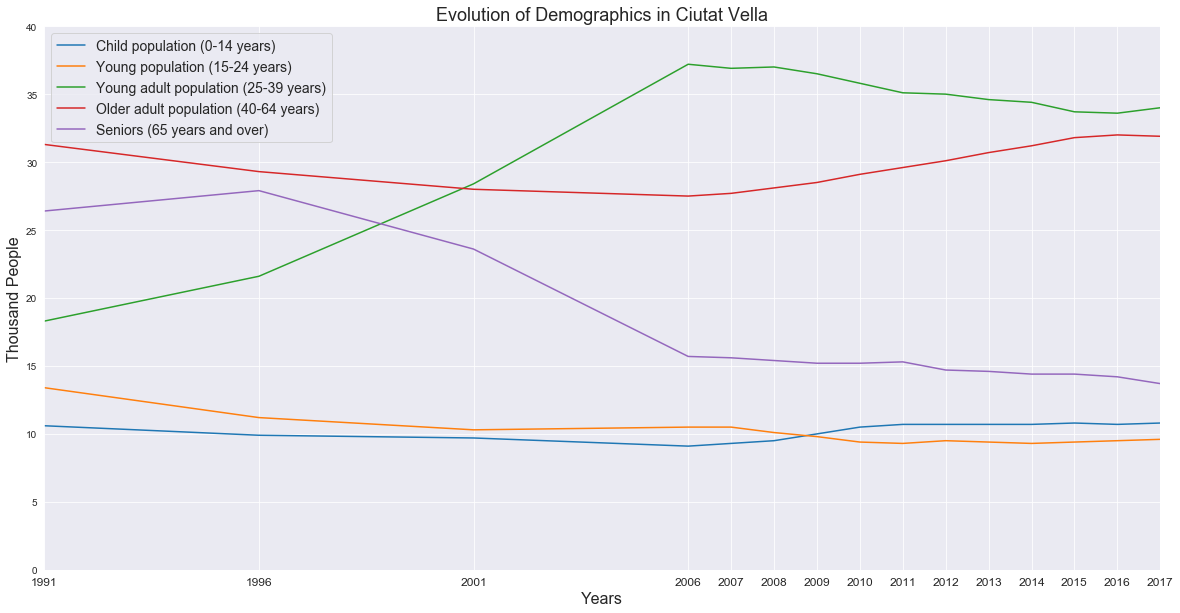

In [229]:
plt.figure(figsize=(20,10))
plt.ylabel("Thousand People", size=16)
plt.ylim([0,40])
plt.xlim([1991,2017])
plt.xticks(yearx, size=12)
plt.xlabel("Years", size=16)
plt.title("Evolution of Demographics in Ciutat Vella", size=18)
plt.plot(yearx, child)
plt.plot(yearx, young)
plt.plot(yearx, youngadult)
plt.plot(yearx, oldadult)
plt.plot(yearx, senior)
plt.legend(dpop["Years"][1:6], fontsize=14, loc=0)


In [168]:
dpop

,Years,1991,1996,2001,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Total Population,90612.0,83829.0,85177.0,118967.0,113082.0,111891.0,109897.0,106873.0,104056.0,105220.0,104334.0,102237.0,100227.0,100451.0,102250.0
1,Child population (0-14 years),10.6,9.9,9.7,9.1,9.3,9.5,10.0,10.5,10.7,10.7,10.7,10.7,10.8,10.7,10.8
2,Young population (15-24 years),13.4,11.2,10.3,10.5,10.5,10.1,9.8,9.4,9.3,9.5,9.4,9.3,9.4,9.5,9.6
3,Young adult population (25-39 years,18.3,21.6,28.4,37.2,36.9,37.0,36.5,35.8,35.1,35.0,34.6,34.4,33.7,33.6,34.0
4,Older adult population (40-64 years),31.3,29.3,28.0,27.5,27.7,28.1,28.5,29.1,29.6,30.1,30.7,31.2,31.8,32.0,31.9
5,Seniors (65 years and over),26.4,27.9,23.6,15.7,15.6,15.4,15.2,15.2,15.3,14.7,14.6,14.4,14.4,14.2,13.7
6,Population that lives alone,12.6,15.1,17.2,13.2,14.0,14.1,14.3,14.9,15.3,15.0,14.8,14.9,14.9,15.0,15.0
7,Population born in Catalonia,60.7,59.4,52.0,34.4,37.1,36.8,37.1,37.7,37.9,37.1,36.9,36.7,36.8,36.4,35.2
8,Population born in the rest of Spain,33.6,30.4,23.8,15.7,15.7,15.2,14.9,15.0,15.0,14.4,13.8,13.2,13.1,12.9,12.3
9,Population born abroad,5.7,10.2,24.2,49.9,47.2,48.0,48.0,47.3,47.1,48.6,49.3,50.0,50.1,50.7,52.5


In [220]:
dpop["Years"][1:6]

1             Child population (0-14 years) 
2            Young population (15-24 years) 
3       Young adult population (25-39 years 
4    Older adult population (40-64 years)   
5               Seniors (65 years and over) 
Name: Years, dtype: object